# Machine Learning - The Titanic


### The Exercise

- For this weeks exercise you need to analyse a dataset and prepare a machine learning model to predict a property of that dataset. The dataset is the data on Titanic passengers and can be found in the data folder.

- There are two parts to todays exercise:
  - Analyse and visualize the data. Look for missing values and for correlations between features, as well as between feature and target. Prepare a brief report with some visualisations of the data, and with a summary of what you observed. This can be a jupyter notebok, some other document, or just part of the PR description with images pasted into it.
  - Train an ML model that will predict for any passenger whether they will survive. Determine whether this is a classification or regression task, and use an appropriate model. Spend some time on optimizing the algorithm and hyperparameters. Report the matthews correlation coefficient calculated on a test set as part of your submission. 


# Part 1: Data Analysis

### Importing the necessary third party libraries...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef, accuracy_score


### Loading the dataset:

In [ ]:
df = pd.read_csv('../../data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- SibSp -> number of siblings aboard
- Parch -> family size (parents/siblings)

### Exploring our data

In [ ]:
df.shape

(891, 12)

In [ ]:
# general overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Key Findings:**
- 177 passengers missing age
- 687 missing cabin number
- 38% survival rate
- Average age: 30 years
- 210x passengers booked in groups


In [ ]:
df['Survived'].value_counts() # Distribution of the target variable

Survived
0    549
1    342
Name: count, dtype: int64

- slightly imbalanced target distribution (60/40)

In [ ]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

- You could have embarked on the titanic in Southampton(S), Cherbourg(C) or Queenstown(Q)
- Since Southampton, England was the departure point, most (freq: 644) passengers embarked there...

### Missing Values Analysis

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Interpretation:**
- Cabin: 77% is missing
- Age: 20% is missing
- Embarked: only 2 missing

### Visualizing the data

#### Categorical Features:

In [ ]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Gender')

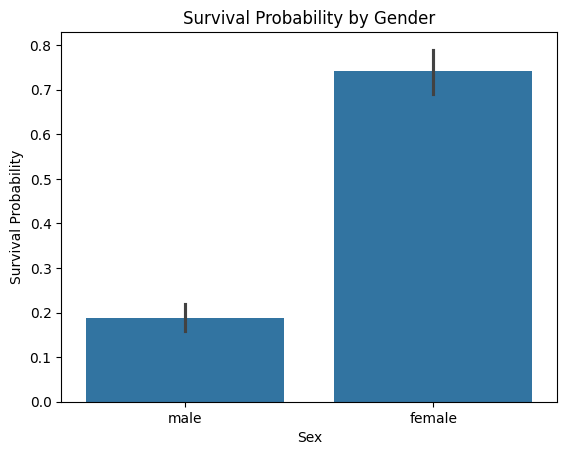

In [ ]:
sns.barplot(data = df, x='Sex', y='Survived')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

- Reason: usually women and children are allowed to go on the safety-boats first

In [ ]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Passenger Class')

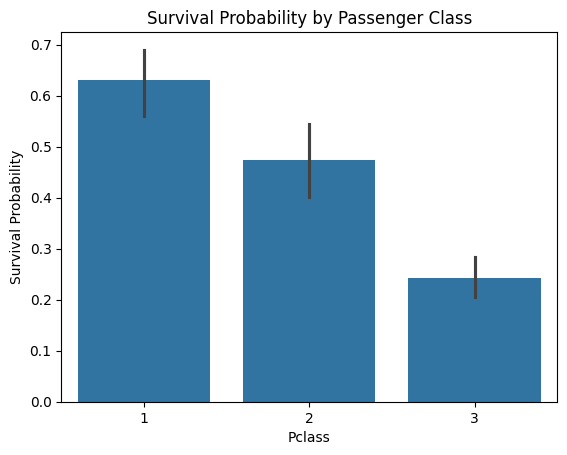

In [ ]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

- Reason: passengers from higher class where probably prioritized during evacuation

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

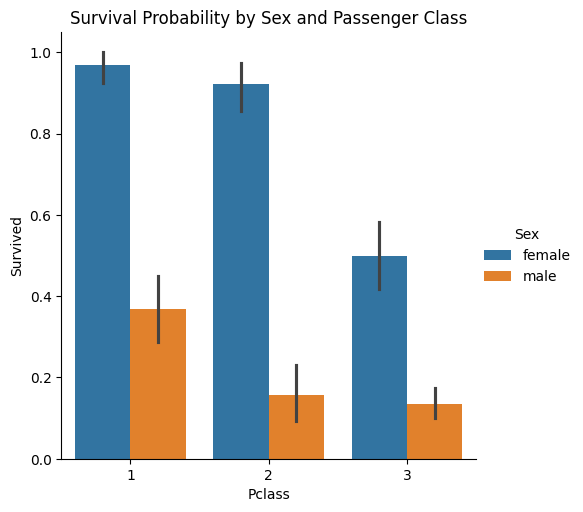

In [ ]:
sns.catplot(x='Pclass', y="Survived", hue='Sex', data=df, kind='bar')

plt.title('Survival Probability by Sex and Passenger Class')

**Conclusions:** 
- Female Passengers always have a higher chance of survival then males
- Higher Class Passengers are always more likely to survive than lower classes
- Female & Class 3: superior

#### Numerical Features:

Text(0.5, 0, 'Age')

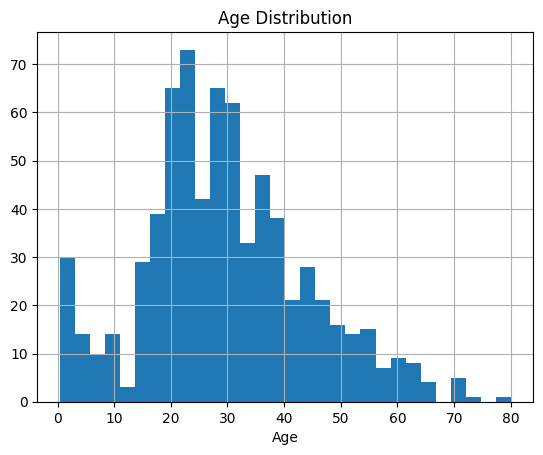

In [ ]:
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')

Text(0.5, 1.0, 'Survival by Age')

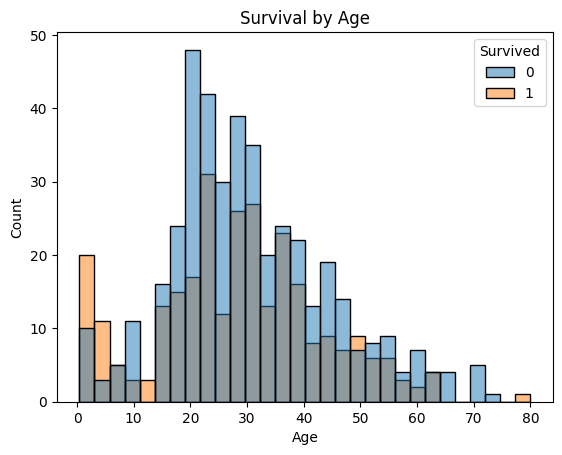

In [ ]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30)
plt.title('Survival by Age')

- Young children where more likely to survive -> get prioratized together with women & can be carried

Text(0.5, 1.0, 'Fare Distribution')

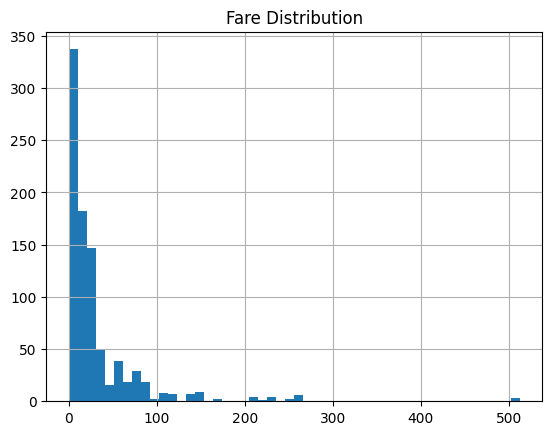

In [ ]:
df['Fare'].hist(bins=50)
plt.title('Fare Distribution')

### Correlations

<Axes: >

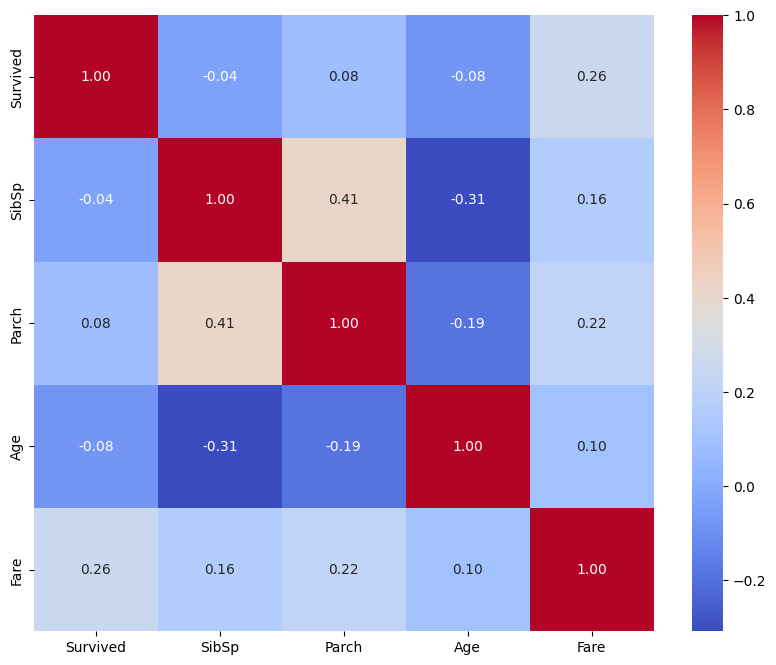

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt = '.2f', cmap='coolwarm')

- Fare has the highest positive correlation

# Part 2: Machine Learning

### Cleaning the data

In [ ]:
df_clean = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) # simplifiing: mostly irrelevant data for the machine learning model, Cabin -> to much data is missing

#### handling missing values in age and embarked

In [ ]:
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)


In [ ]:
df_clean['Embarked'].fillna('S', inplace=True)

In [ ]:
df_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### turn text into numeric features

In [ ]:
df_clean['Sex'].replace(to_replace=['male', 'female'], value=[0,1], inplace = True)

/tmp/ipykernel_25203/2872334342.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Sex'].replace(to_replace=['male', 'female'], value=[0,1], inplace = True)


In [ ]:
df_clean['Embarked'].replace(to_replace=['S', 'C', 'Q'], value=[0, 1, 2], inplace = True)
df_clean.head()

/tmp/ipykernel_25203/63052663.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Embarked'].replace(to_replace=['S', 'C', 'Q'], value=[0, 1, 2], inplace = True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


### Feature Engeneering

- AlonePassenger -> I'm guessing its more likely to die

In [ ]:
# 1 if traveling alone, 0 if with family
df_clean['AlonePassenger'] = ((df_clean['SibSp'] == 0) & (df_clean['Parch'] == 0)).astype(int)

df_clean.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AlonePassenger
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,0
4,0,3,0,35.0,0,0,8.0500,0,1
5,0,3,0,28.0,0,0,8.4583,2,1
6,0,1,0,54.0,0,0,51.8625,0,1
7,0,3,0,2.0,3,1,21.0750,0,0
8,1,3,1,27.0,0,2,11.1333,0,0
9,1,2,1,14.0,1,0,30.0708,1,0


### Train/Test Split

In [ ]:
# separate features and target;
x = df_clean.drop('Survived', axis = 1)
y = df_clean['Survived']

In [ ]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AlonePassenger
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,0
4,3,0,35.0,0,0,8.0500,0,1


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
print("Features shape:", x.shape)
print("Target shape:", y.shape)   

Features shape: (891, 8)
Target shape: (891,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
print(f"Training set: {x_train.shape}")
print(f"Test set: {y_test.shape}")

Training set: (712, 8)
Test set: (179,)


In [ ]:
# verify that the stratify option did what it should -> ratio of dead : survivors
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([439, 273]))
(array([0, 1]), array([110,  69]))


in both: around 0.62% die...

### Model Selection -> Classification Problem

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
results = {}
for name, model in models.items():
    # Training
    model.fit(x_train, y_train)
    
    # Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # metrics
    train_mcc = matthews_corrcoef(y_train, y_train_pred)
    test_mcc = matthews_corrcoef(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    
    results[name] = {
        'Train MCC': train_mcc,
        'Test MCC': test_mcc,
        'Accuracy': acc
    }
    print(f"{name}:")
    print(f"  Train MCC: {train_mcc:.4f}")
    print(f"  Test MCC:  {test_mcc:.4f}")
    print(f"  Accuracy:  {acc:.4f}\n")


best_model = None
best_mcc = -1

for name, metrics in results.items():
    if metrics['Test MCC'] > best_mcc:
        best_mcc = metrics['Test MCC']
        best_model = name

print(f"Best Model: {best_model}")


Decision Tree:
  Train MCC: 0.9587
  Test MCC:  0.5108
  Accuracy:  0.7709

Random Forest:
  Train MCC: 0.9584
  Test MCC:  0.6044
  Accuracy:  0.8156



Gradient Boosting:
  Train MCC: 0.7850
  Test MCC:  0.6170
  Accuracy:  0.8212

Best Model: Gradient Boosting


- Mhh...
    - seems overfitted in all cases

### Hyperparameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [20, 25, 30, 50, 100, 150, 200],
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10, n_jobs = 4, scoring='matthews_corrcoef', verbose = 1)
grid


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [2, 5, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [25, 50, ...]}"
,scoring,'matthews_corrcoef'
,n_jobs,4
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [ ]:
grid.fit(x_train, y_train)

best_rf = grid.best_estimator_

y_pred = best_rf.predict(x_test)
final_mcc = matthews_corrcoef(y_test, y_pred)
final_acc = accuracy_score(y_test, y_pred)

print("Best parameters:", grid.best_params_)
print(f"Final Test MCC: {final_mcc:.4f}")
print(f"Final Test Accuracy: {final_acc:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 25}
Final Test MCC: 0.6787
Final Test Accuracy: 0.8492


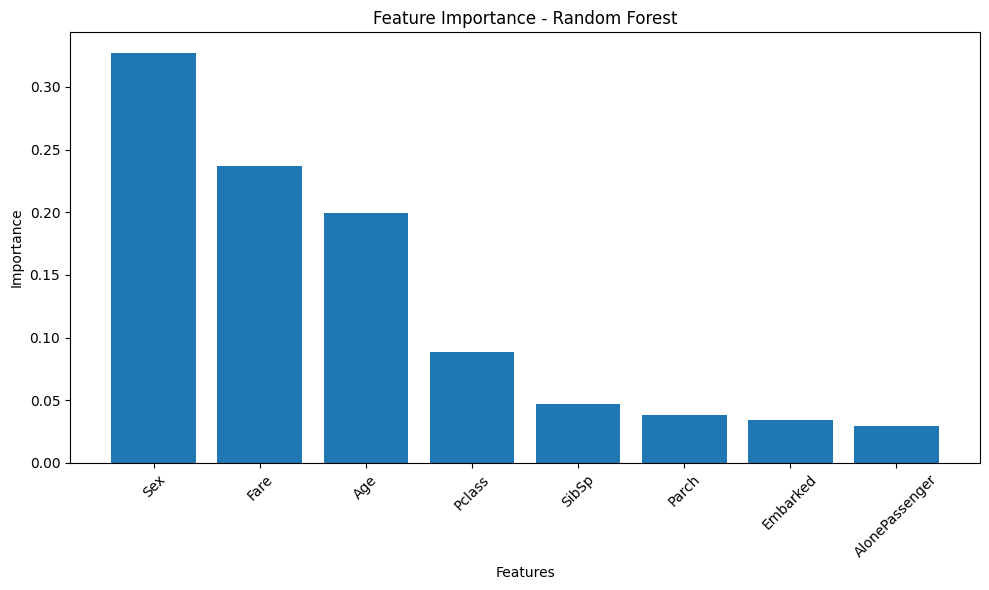

In [ ]:
# Feature Importance
importances = best_rf.feature_importances_
feature_names = x.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.title('Feature Importance - Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

- Sex, Fare and Age seem to have the most impact on my model